<a href="https://colab.research.google.com/github/Ajayprr/ml1_Ames-Iowa-House-Prices/blob/master/ml1_Ames%2C_Iowa_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy.stats as st
from scipy import stats
from scipy.special import boxcox1p
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


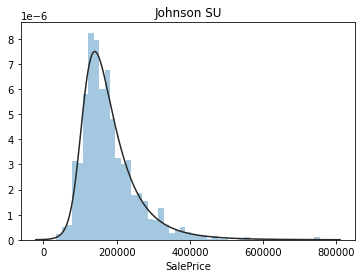

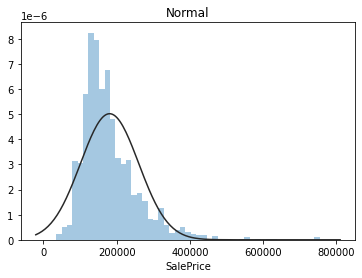

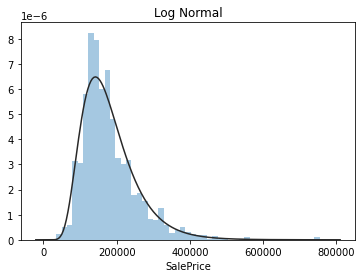

In [7]:
# Checking distribution
y = df_train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

In [0]:
# Looking for outliers on features
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#numeric_train = df_train.select_dtypes(include=numerics)

#for feature in numeric_train:
#    if feature != 'SalePrice' and feature != 'Id':
#        plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
#        plt.scatter(numeric_train[feature], numeric_train['SalePrice'])
#        plt.xlabel(feature)
#        plt.xticks(rotation=90)
#        plt.ylabel('SalePrice')
#        plt.show()


In [0]:
# Cutting off numerical outliers
df_train = df_train.drop(df_train[(df_train.SalePrice >= 700000)].index)
df_train = df_train.drop(df_train[(df_train.LotFrontage >= 200)].index)
df_train = df_train.drop(df_train[(df_train.LotArea >= 100000)].index)
df_train = df_train.drop(df_train[(df_train.OverallQual == 4) & (df_train.SalePrice > 200000)].index)
df_train = df_train.drop(df_train[(df_train.OverallQual == 8) & (df_train.SalePrice > 500000)].index)
df_train = df_train.drop(df_train[(df_train.OverallQual == 10) & (df_train.SalePrice < 300000)].index)
df_train = df_train.drop(df_train[(df_train.OverallCond == 2) & (df_train.SalePrice > 300000)].index)
df_train = df_train.drop(df_train[(df_train.OverallCond == 5) & (df_train.SalePrice > 700000)].index)
df_train = df_train.drop(df_train[(df_train.OverallCond == 6) & (df_train.SalePrice > 700000)].index)
df_train = df_train.drop(df_train[(df_train.YearBuilt <= 1900) & (df_train.SalePrice > 200000)].index)
df_train = df_train.drop(df_train[(df_train.MasVnrArea >= 1200)].index)
df_train = df_train.drop(df_train[(df_train.BsmtFinSF1 >= 3000)].index)
df_train = df_train.drop(df_train[(df_train.BsmtFinSF2 >= 1200)].index)
df_train = df_train.drop(df_train[(df_train.TotalBsmtSF >= 4000)].index)
df_train = df_train.drop(df_train[(df_train['1stFlrSF'] >= 4000)].index)
df_train = df_train.drop(df_train[(df_train.LowQualFinSF > 500) & (df_train.SalePrice > 400000)].index)
df_train = df_train.drop(df_train[(df_train.GrLivArea >= 4000)].index)
df_train = df_train.drop(df_train[(df_train.BedroomAbvGr >= 7)].index)
df_train = df_train.drop(df_train[(df_train.KitchenAbvGr < 1)].index)
df_train = df_train.drop(df_train[(df_train.TotRmsAbvGrd > 12)].index)
df_train = df_train.drop(df_train[(df_train.Fireplaces > 2)].index)
df_train = df_train.drop(df_train[(df_train.GarageCars > 3)].index)
df_train = df_train.drop(df_train[(df_train.GarageArea > 1200) & (df_train.SalePrice < 300000)].index)
df_train = df_train.drop(df_train[(df_train.WoodDeckSF > 700)].index)
df_train = df_train.drop(df_train[(df_train.OpenPorchSF > 450)].index)
df_train = df_train.drop(df_train[(df_train.EnclosedPorch > 450)].index)
df_train = df_train.drop(df_train[(df_train['3SsnPorch'] > 350)].index)

In [9]:
# Joining DFs for ease of processing
full = pd.concat([df_train, df_test], ignore_index = True)
full.drop(['SalePrice'], axis=1, inplace=True)

# Starting to handle categoric columns

# "MiscFeature" column
words_set = set()
for data in full['MiscFeature']:
    if not pd.isnull(data):
        for word in data.split(' '):
            words_set.add(word)
#print ("Raw words set: {}".format(words_set))

for feature in words_set:
    count = 0
    for data in full['MiscFeature']:
        if not pd.isnull(data):
            if feature in data:
                count += 1
    print ("Category {}: {} samples".format(feature, count))

Category Gar2: 5 samples
Category Othr: 4 samples
Category TenC: 1 samples
Category Shed: 91 samples


In [10]:
def add_columns (dataframe):
    add_categorical = ['Othr', 'TenC', 'Gar2', 'Shed']
    for column in add_categorical:
        data = dataframe['MiscVal'][dataframe['MiscFeature'] == column]
        dataframe[column] = pd.Series(data, index = dataframe.index).fillna(value=0)
    dataframe.drop(columns = ['MiscFeature'], inplace = True)
    dataframe.drop(columns = ['MiscVal'], inplace = True)

add_columns(full)
    
# Checking data shapes
print ("Full data shape is {}".format(full.shape))

Full data shape is (2880, 82)


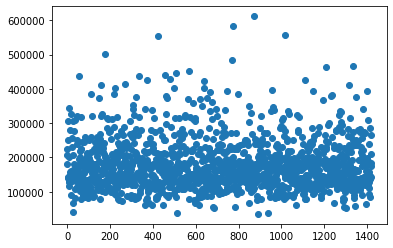

In [11]:
plt.scatter(range(0, len(df_train['SalePrice'])), df_train['SalePrice'])
plt.show()

In [0]:
categorical_features = [
    'Alley',            # Will have to check on plot
    'BldgType',         # Will have to check on plot
    'BsmtCond',         # Simple mapping w/ NaN
    'BsmtExposure',     # Simple mapping w/ NaN
    'BsmtFinType1',     # Will have to check on plot
    'BsmtFinType2',     # Will have to check on plot
    'BsmtQual',         # Simple mapping w/ NaN
    'CentralAir',       # Yes/No
    'Condition1',       # Will have to check on plot
    'Condition2',       # Will have to check on plot
    'Electrical',       # Will have to check on plot
    'ExterCond',        # Simple mapping
    'Exterior1st',      # Will have to check on plot
    'Exterior2nd',      # Will have to check on plot
    'ExterQual',        # Simple mapping
    'Fence',            # Will have to check on plot
    'FireplaceQu',      # Simple mapping w/ NaN
    'Foundation',       # Will have to check on plot
    'Functional',       # Will have to check on plot
    'GarageCond',       # Simple mapping w/ NaN
    'GarageFinish',     # Simple mapping w/ NaN
    'GarageQual',       # Simple mapping w/ NaN
    'GarageType',       # Will have to check on plot
    'Heating',          # Will have to check on plot
    'HeatingQC',        # Simple mapping
    'HouseStyle',       # Will have to check on plot
    'KitchenQual',      # Simple mapping
    'LandContour',      # Will have to check on plot
    'LandSlope',        # Will have to check on plot
    'LotConfig',        # Will have to check on plot
    'LotShape',         # Will have to check on plot
    'MasVnrType',       # Will have to check on plot
    'MSZoning',         # Will have to check on plot
    'Neighborhood',     # Will use this to extract latitude/longitude
    'PavedDrive',       # Simple mapping
    'PoolQC',           # Simple mapping w/ NaN
    'RoofMatl',         # Will have to check on plot
    'RoofStyle',        # Will have to check on plot
    'SaleCondition',    # Will have to check on plot
    'SaleType',         # Will have to check on plot
    'Street',           # Simple mapping
    'Utilities'         # Will parse this into separate features
]

numerical_features = [
    '1stFlrSF',         # SqFt value, won't change anything here for now
    '2ndFlrSF',         # SqFt value, won't change anything here for now
    '3SsnPorch',        # SqFt value, won't change anything here for now
    'BsmtFinSF1',       # SqFt value, won't change anything here for now
    'BsmtFinSF2',       # SqFt value, won't change anything here for now
    'BsmtFullBath',     # Absolute number, won't change anything here for now
    'BsmtHalfBath',     # Absolute number, won't change anything here for now
    'BsmtUnfSF',        # SqFt value, won't change anything here for now
    'EnclosedPorch',    # SqFt value, won't change anything here for now
    'Fireplaces',       # Absolute number, won't change anything here for now
    'FullBath',         # Absolute number, won't change anything here for now
    'GarageArea',       # SqFt value, won't change anything here for now
    'GarageCars',       # Absolute number, won't change anything here for now
                        #
    'GarageYrBlt',      # Will use this for creating a "GarageAge" feature
                        #
    'GrLivArea',        # SqFt value, won't change anything here for now
    'HalfBath',         # Absolute number, won't change anything here for now
    'LotArea',          # SqFt value, won't change anything here for now
    'LotFrontage',      # Absolute number, won't change anything here for now
    'LowQualFinSF',     # SqFt value, won't change anything here for now
    'MasVnrArea',       # SqFt value, won't change anything here for now
    'MoSold',           # Absolute number, won't change anything here for now
    'MSSubClass',       # Absolute number, won't change anything here for now
    'OpenPorchSF',      # SqFt value, won't change anything here for now
    'OverallCond',      # Absolute number, won't change anything here for now
    'OverallQual',      # Absolute number, won't change anything here for now
                        #
    'PoolArea',         # Will use this for creating a "Pool" feature
                        #
    'ScreenPorch',      # SqFt value, won't change anything here for now
    'TotalBsmtSF',      # SqFt value, won't change anything here for now
    'TotRmsAbvGrd',     # Absolute number, won't change anything here for now
    'WoodDeckSF',       # SqFt value, won't change anything here for now
                        #
    'YearBuilt',        # Will use this for creating a "HouseAge" feature
                        #
    'YearRemodAdd',     # Will use this for creating a "RemodelAge" feature
                        #
    'YrSold',           # Absolute number, won't change anything here for now
    'BedroomAbvGr',     # Absolute number, won't change anything here for now
    'KitchenAbvGr',     # Absolute number, won't change anything here for now
    'Othr',             # Extracted from 'MiscFeature' column
    'TenC',             # Extracted from 'MiscFeature' column
    'Gar2',             # Extracted from 'MiscFeature' column
    'Shed'              # Extracted from 'MiscFeature' column
]

In [13]:
# Creating "GarageAge", "RemodelAge" and "HouseAge" features
def createAgeFeatures (dataframe):
    dataframe['GarageAge'] = dataframe['GarageYrBlt'].apply(lambda x: 2019 - x)
    dataframe['RemodelAge'] = dataframe['YearRemodAdd'].apply(lambda x: 2019 - x)
    dataframe['HouseAge'] = dataframe['YearBuilt'].apply(lambda x: 2019 - x)

# Creating "Pool" feature
def createPoolFeature (dataframe):
    dataframe['Pool'] = dataframe['PoolArea'].apply(lambda x: x != 0).map({True: 1, False: 0})

# Handling numerical features
def handleNumericalFeatures (dataframe):
    createAgeFeatures(dataframe)
    createPoolFeature(dataframe)

handleNumericalFeatures(full)

# Checking data shapes
print ("Full data shape is {}".format(full.shape))

Full data shape is (2880, 86)


In [0]:
# Mapping the "Simple mapping" features
def mapSimpleMapping (dataframe):
    # features = ['ExterCond', 'ExterQual', 'HeatingQC', 'KitchenQual', 'PavedDrive', 'Street']
    dataframe['ExterCond'] = dataframe['ExterCond'].map({
        'Ex' : 2,
        'Gd' : 1,
        'TA' : 0,
        'Fa' : -1,
        'Po' : -2
    })
    dataframe['ExterQual'] = dataframe['ExterQual'].map({
        'Ex' : 2,
        'Gd' : 1,
        'TA' : 0,
        'Fa' : -1,
        'Po' : -2
    })
    dataframe['HeatingQC'] = dataframe['HeatingQC'].map({
        'Ex' : 2,
        'Gd' : 1,
        'TA' : 0,
        'Fa' : -1,
        'Po' : -2
    })
    dataframe['KitchenQual'] = dataframe['KitchenQual'].map({
        'Ex' : 2,
        'Gd' : 1,
        'TA' : 0,
        'Fa' : -1,
        'Po' : -2
    })
    dataframe['PavedDrive'] = dataframe['PavedDrive'].map({
        'Y' : 1,
        'P' : 0.5,
        'N' : 0,
    })
    dataframe['Street'] = dataframe['Street'].map({
        'Grvl' : -1,
        'Pave' : 1,
    })

# Mapping the "Simple mapping w/ NaN" features
def mapSimpleWithNan (dataframe):
    #features = ['BsmtCond', 'BsmtExposure', 'BsmtQual', 'FireplaceQu',
    #            'GarageCond', 'GarageFinish', 'GarageQual', 'PoolQC']
    dataframe['BsmtCond'] = dataframe['BsmtCond'].map({
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        'Po' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['BsmtExposure'] = dataframe['BsmtExposure'].map({
        'Gd' : 3,
        'Av' : 2,
        'Mn' : 1,
        'No' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['BsmtQual'] = dataframe['BsmtQual'].map({
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        'Po' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['FireplaceQu'] = dataframe['FireplaceQu'].map({
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        'Po' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['GarageCond'] = dataframe['GarageCond'].map({
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        'Po' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['GarageFinish'] = dataframe['GarageFinish'].map({
        'Fin' : 2,
        'RFn' : 1,
        'Unf' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['GarageQual'] = dataframe['GarageQual'].map({
        'Ex' : 4,
        'Gd' : 3,
        'TA' : 2,
        'Fa' : 1,
        'Po' : 0,
        'NA' : -1
    }).fillna(-1)
    dataframe['PoolQC'] = dataframe['PoolQC'].map({
        'Ex' : 3,
        'Gd' : 2,
        'TA' : 1,
        'Fa' : 0,
        'NA' : -1
    }).fillna(-1)

# Mapping boolean features
def mapBoolean (dataframe):
    dataframe['CentralAir'] = dataframe['CentralAir'].map({
        'N' : 0,
        'Y' : 1,
    })

# Handling mapped categorical features
def handleMappedCategorical (dataframe):
    mapSimpleMapping(dataframe)
    mapSimpleWithNan(dataframe)
    mapBoolean(dataframe)

handleMappedCategorical(full)

In [0]:
# Checking plots for other categorical features
check_plot_features = [
    'Alley',
    'BldgType',
    'BsmtFinType1',
    'BsmtFinType2',
    'Condition1',
    'Condition2',
    'Electrical',
    'Exterior1st',
    'Exterior2nd',
    'Fence',
    'Foundation',
    'Functional',
    'GarageType',
    'Heating',
    'HouseStyle',
    'LandContour',
    'LandSlope',
    'LotConfig',
    'LotShape',
    'MasVnrType',
    'MSZoning',
    'RoofMatl',
    'RoofStyle',
    'SaleCondition',
    'SaleType'
]

#for feature in check_plot_features:
#    data = pd.concat([df_train['SalePrice'], df_train[feature]], axis=1)
#    f, ax = plt.subplots(figsize=(16, 10))
#    fig = sns.boxplot(x=feature, y="SalePrice", data=data)
#    fig.axis(ymin=0);
#    xt = plt.xticks(rotation=45)
#    plt.xticks(rotation=90)
#    plt.show()


In [16]:
#
#    After plots observation, I decided to proceed with the following:
#
#    'Alley',
#	'Grvl' : 0, 'Pave' : 1
#
#    'BldgType',
#	One-hot encoding only
#
#    'BsmtFinType1',
#	One-hot encoding only
#
#    'BsmtFinType2',
#	One-hot encoding only
#
#    'Condition1',
#	Create features using information about distance
#	One-hot encoding
#
#    'Condition2',
#	Create features using information about distance
#	One-hot encoding
#
#    'Electrical',
#	'Mix' : 0, 'FuseP' : 1, 'FuseF' : 2, 'FuseA' : 3, 'SBrkr' : 4
#
#    'Exterior1st',
#	One-hot encoding only
#
#    'Exterior2nd',
#	One-hot encoding only
#
#    'Fence',
#	Separate in two features:
#	'FencePrivacy'
#		'MnPrv' : 0, 'GdPrv': 1, 'NA' : -1
#	'FenceWood'
#		'MnWw' : 0, 'GdWo' : 1, 'NA' : -1
#
#    'Foundation',
#	One-hot encoding only
#
#    'Functional',
#	'Typ' : 0, 'Min1' : -1, 'Min2' : -2, 'Mod' : -3, 'Maj1' : -4, 'Maj2' : -5, 'Sev' : -6, 'Sal' : -7
#
#    'GarageType',
#	One-hot encoding only
#
#    'Heating',
#	One-hot encoding only
#
#    'HouseStyle',
#	One-hot encoding only
#
#    'LandContour',
#	One-hot encoding only
#
#    'LandSlope',
#	One-hot encoding only
#
#    'LotConfig',
#	One-hot encoding only
#
#    'LotShape',
#	'Reg' : 0, 'IR1' : -1, 'IR2' : -2, 'IR3' : -3
#
#    'MasVnrType',
#	One-hot encoding only
#
#    'MSZoning',
#	One-hot encoding only
#
#    'RoofMatl',
#	One-hot encoding only
#
#    'RoofStyle',
#	One-hot encoding only
#
#    'SaleCondition',
#	One-hot encoding only
#
#    'SaleType'
#	One-hot encoding only
#
#    'Neighborhood'
#	Will use this to extract latitude/longitude
#
#    'Utilities'
#	Will parse this into separate features

# One-hot encodings
one_hots = ['BldgType', 'BsmtFinType1', 'BsmtFinType2', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd',
           'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig',
           'MasVnrType', 'MSZoning', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType']

def doOneHot (dataframe):
    try:
        for category in one_hots:
            df = pd.Categorical(dataframe[category])
            dfDummies = pd.get_dummies(df, prefix = category)
            dataframe = pd.concat([dataframe, dfDummies], axis=1)
            if category not in ['Condition1', 'Condition2']:
                dataframe.drop(columns = [category], inplace = True)
        return dataframe
    except KeyError:
        print ("Oops! Category {} not found! Probably this has already been done...".format(category))
        return dataframe
        

# Processing one-hots
full = doOneHot(full)

# Checking data shapes
print ("Full data shape is {}".format(full.shape))

Full data shape is (2880, 208)


In [17]:
# Still missing handling:
# - Alley
# - Condition1
# - Condition2
# - Electrical
# - Fence
# - Functional
# - LotShape
# - Neighborhood
# - Utilities

def handleAlley (dataframe):
    dataframe['Alley'] = dataframe['Alley'].map({'Grvl' : 0, 'Pave' : 1})

def handleConditions (dataframe):
    handler = {
        'Normal' : 0,  # ??
        'RRNn'   : 1,  # Within 200'
        'RRNe'   : 1,  #
        'PosN'   : 2,  # Near
        'Artery' : 3,  # Adjacent
        'Feedr'  : 3,  #
        'RRAn'   : 3,
        'PosA'   : 3,
        'RRAe'   : 3
    }
    dataframe['Condition1'] = dataframe['Condition1'].map(handler)
    dataframe['Condition2'] = dataframe['Condition2'].map(handler)
    
def handleElectrical (dataframe):
    handler = {'Mix' : 0, 'FuseP' : 1, 'FuseF' : 2, 'FuseA' : 3, 'SBrkr' : 4}
    dataframe['Electrical'] = dataframe['Electrical'].map(handler)

def handleFunctional (dataframe):
    handler = {'Typ' : 0, 'Min1' : -1, 'Min2' : -2, 'Mod' : -3, 'Maj1' : -4, 'Maj2' : -5, 'Sev' : -6, 'Sal' : -7}
    dataframe['Functional'] = dataframe['Functional'].map(handler)

def handleLotShape (dataframe):
    handler = {'Reg' : 0, 'IR1' : -1, 'IR2' : -2, 'IR3' : -3}
    dataframe['LotShape'] = dataframe['LotShape'].map(handler)
    
def handlePostOneHots (dataframe):
    handleAlley(dataframe)
    handleConditions(dataframe)
    handleElectrical(dataframe)
    handleFunctional(dataframe)
    handleLotShape(dataframe)
    
handlePostOneHots(full)

# Checking data shapes
print ("Full data shape is {}".format(full.shape))

Full data shape is (2880, 208)


In [18]:
# Still missing handling:
# - Fence
# - Neighborhood
# - Utilities

def handleFence (dataframe):
    dataframe['FencePrivacy'] = dataframe['Fence'].map({'MnPrv' : 0, 'GdPrv': 1}).fillna(-1)
    dataframe['FenceWood'] = dataframe['Fence'].map({'MnWw' : 0, 'GdWo': 1}).fillna(-1)
    dataframe.drop(columns = ['Fence'], inplace = True)
    return dataframe

full = handleFence (full)

# Checking data shapes
print ("Full data shape is {}".format(full.shape))

Full data shape is (2880, 209)


In [19]:
# Still missing handling:
# - Neighborhood
# - Utilities

def handleUtilities (dataframe):
    dataframe['Electricity'] = dataframe['Utilities'].map({'AllPub' : 1, 'NoSewr' : 1, 'NoSeWa' : 1, 'ELO' : 1}).fillna(0)
    dataframe['Gas'] = dataframe['Utilities'].map({'AllPub' : 1, 'NoSewr' : 1, 'NoSeWa' : 1, 'ELO' : 0}).fillna(0)
    dataframe['Water'] = dataframe['Utilities'].map({'AllPub' : 1, 'NoSewr' : 1, 'NoSeWa' : 0, 'ELO' : 0}).fillna(0)
    dataframe['Septic Tank'] = dataframe['Utilities'].map({'AllPub' : 1, 'NoSewr' : 0, 'NoSeWa' : 0, 'ELO' : 0}).fillna(0)
    dataframe.drop(columns = ['Utilities'], inplace = True)
    return dataframe

full = handleUtilities (full)

# Checking data shapes
print ("Full data shape is {}".format(full.shape))

Full data shape is (2880, 212)


In [20]:
# Still missing handling:
# - Neighborhood

geo_heatmap = {
    'Neighborhood' : [
        'Blmngtn',
        'Blueste',
        'BrDale',
        'BrkSide',
        'ClearCr',
        'CollgCr',
        'Crawfor',
        'Edwards',
        'Gilbert',
        'IDOTRR',
        'MeadowV',
        'Mitchel',
        'NAmes',
        'NoRidge',
        'NPkVill',
        'NridgHt',
        'NWAmes',
        'OldTown',
        'SWISU',
        'Sawyer',
        'SawyerW',
        'Somerst',
        'StoneBr',
        'Timber',
        'Veenker'
    ],
    'Latitude' : [
        42.0563761,
        42.0218678,
        42.052795,
        42.024546,
        42.0360959,
        42.0214232,
        42.028025,
        42.0154024,
        42.1068177,
        42.0204395,
        41.997282,
        41.9903084,
        42.046618,
        42.048164,
        42.0258352,
        42.0597732,
        42.0457802,
        42.029046,
        42.0266187,
        42.0295218,
        42.034611,
        42.0508817,
        42.0595539,
        41.9999732,
        42.0413042
    ],
    'Longitude' : [
        -93.6466598,
        -93.6702853,
        -93.6310097,
        -93.6545201,
        -93.6575849,
        -93.6584089,
        -93.6093286,
        -93.6875441,
        -93.6553512,
        -93.6243787,
        -93.6138098,
        -93.603242,
        -93.6362807,
        -93.6496766,
        -93.6613958,
        -93.65166,
        -93.6472075,
        -93.6165288,
        -93.6486541,
        -93.7102833,
        -93.7024257,
        -93.6485768,
        -93.6365891,
        -93.6518812,
        -93.6524905
    ]
}

train_neighborhood = set(df_train['Neighborhood'].tolist())

geo_dataframe = pd.DataFrame.from_dict(geo_heatmap)

geo_dataframe = geo_dataframe[geo_dataframe['Neighborhood'].isin(train_neighborhood)]

geo_dataframe["SalePrice"] = pd.Series(df_train.groupby(["Neighborhood"]).mean()["SalePrice"].values, index = geo_dataframe.index)

import folium
from folium.plugins import HeatMap
max_amount = float(geo_dataframe['SalePrice'].max())
hmap = folium.Map(location = [42.045042,-93.6473567], zoom_start = 12)
hm_wide = HeatMap (list (zip (geo_dataframe.Latitude.values, geo_dataframe.Longitude.values, geo_dataframe.SalePrice.values)),
                   min_opacity = 0.4,
                   max_val = max_amount,
                       radius = 17,
                   blur = 15,
                   max_zoom = 1
                  )
hmap.add_child(hm_wide)


In [21]:
# Building auxiliar dicts
lat_dict = {}
lon_dict = {}
for i in range(len(geo_heatmap['Neighborhood'])):
    neighborhood = geo_heatmap['Neighborhood'][i]
    lat = geo_heatmap['Latitude'][i]
    lon = geo_heatmap['Longitude'][i]
    lat_dict[neighborhood] = lat
    lon_dict[neighborhood] = lon

# Method that adds latitude and longitude columns
def add_lat_lon_columns (df):
    df ['Latitude'] = df['Neighborhood'].map(lat_dict)
    df ['Longitude'] = df['Neighborhood'].map(lon_dict)
    df.drop(columns=['Neighborhood'], inplace=True)
    
# Adding columns to train and test sets
add_lat_lon_columns(full)

# Checking data shapes
print ("Full data shape is {}".format(full.shape))

Full data shape is (2880, 213)


In [22]:
# Checking for missing data
missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Condition2      2852
Alley           2686
Condition1      2480
LotFrontage      480
GarageAge        156
GarageYrBlt      156
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
Functional         2
KitchenQual        1
Electrical         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
GarageCars         1
TotalBsmtSF        1
dtype: int64

In [23]:
# Handling KitchenQual w/ average values
full['KitchenQual'] = full['KitchenQual'].fillna(0)

missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Condition2      2852
Alley           2686
Condition1      2480
LotFrontage      480
GarageAge        156
GarageYrBlt      156
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
Functional         2
Electrical         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
GarageCars         1
TotalBsmtSF        1
dtype: int64

In [24]:
# Checking missing Garage stuff
full[full['GarageArea'].isnull()]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank,Latitude,Longitude
2537,2577,70,50.0,9060,1,NaN,0,NaN,NaN,5,6,1923,1999,0.0,0,0,3.0,2.0,0.0,548.0,0.0,311.0,859.0,2,1,4.0,942,886,0,1828,0.0,0.0,2,0,3,1,1.0,6,0.0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,-1.0,1.0,1.0,1.0,1.0,42.02044,-93.624379


In [25]:
# Will fill this single one with "no-garage" information
new = full.iloc[2576].copy()
new['GarageArea'] = 0
new['GarageCars'] = 0
new['GarageCond'] = -1
new['GarageFinish'] = -1
new['GarageQual'] = -1

full.iloc[2576] = new.copy()

missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Condition2      2852
Alley           2686
Condition1      2480
LotFrontage      480
GarageAge        156
GarageYrBlt      156
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
Functional         2
Electrical         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
GarageCars         1
TotalBsmtSF        1
dtype: int64

In [26]:
# As the missing "Electrical" is from our train dataframe, put the average value (from 0 to 4)
full['Electrical'] = full['Electrical'].fillna(2)

missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Condition2      2852
Alley           2686
Condition1      2480
LotFrontage      480
GarageAge        156
GarageYrBlt      156
MasVnrArea        23
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
GarageCars         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

In [27]:
# Checking missing BsmtFinSF1
full[full['BsmtFinSF1'].isnull()]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank,Latitude,Longitude
2081,2121.0,20.0,99.0,5940.0,1.0,NaN,-1.0,3.0,NaN,4.0,7.0,1946.0,1950.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,1.0,3.0,896.0,0.0,0.0,896.0,NaN,NaN,1.0,0.0,2.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,1.0,42.024546,-93.65452


In [28]:
# As BsmtFinSF1, BsmtFinSF2, TotalBsmtSF and BsmtUnfSF are sqft data of houses without basement, will fill
# with zeros
full['BsmtFinSF1'] = full['BsmtFinSF1'].fillna(0)
full['BsmtFinSF2'] = full['BsmtFinSF2'].fillna(0)
full['TotalBsmtSF'] = full['TotalBsmtSF'].fillna(0)
full['BsmtUnfSF'] = full['BsmtUnfSF'].fillna(0)

missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Condition2      2852
Alley           2686
Condition1      2480
LotFrontage      480
GarageAge        156
GarageYrBlt      156
MasVnrArea        23
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
GarageCars         1
dtype: int64

In [29]:
# Checking missing BsmtFullBath
full[full['BsmtFullBath'].isnull()]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank,Latitude,Longitude
2081,2121.0,20.0,99.0,5940.0,1.0,NaN,-1.0,3.0,NaN,4.0,7.0,1946.0,1950.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,896.0,0.0,0.0,896.0,NaN,NaN,1.0,0.0,2.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,1.0,42.024546,-93.654520
2149,2189.0,20.0,123.0,47007.0,1.0,NaN,-1.0,NaN,NaN,5.0,7.0,1959.0,1996.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3820.0,0.0,0.0,3820.0,NaN,NaN,3.0,1.0,5.0,1.0,2.0,11.0,0.0,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.015402,-93.687544


In [30]:
# As these samples refer to houses without basement, fill with zeros
full['BsmtFullBath'] = full['BsmtFullBath'].fillna(0)
full['BsmtHalfBath'] = full['BsmtHalfBath'].fillna(0)

missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Condition2     2852
Alley          2686
Condition1     2480
LotFrontage     480
GarageAge       156
GarageYrBlt     156
MasVnrArea       23
Functional        2
GarageArea        1
GarageCars        1
dtype: int64

In [31]:
# Checking missing Functional
full[full['Functional'].isnull()]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank,Latitude,Longitude
2177,2217.0,20.0,80.0,14584.0,1.0,NaN,0.0,NaN,NaN,1.0,5.0,1952.0,1952.0,0.0,-1.0,-2.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-2.0,0.0,3.0,733.0,0.0,0.0,733.0,0.0,0.0,1.0,0.0,2.0,1.0,-1.0,4.0,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.02044,-93.624379
2434,2474.0,50.0,60.0,10320.0,1.0,0.0,0.0,3.0,NaN,4.0,1.0,1910.0,1950.0,0.0,-1.0,-1.0,2.0,1.0,0.0,0.0,0.0,771.0,771.0,-1.0,1.0,4.0,866.0,504.0,114.0,1484.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,6.0,NaN,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.02044,-93.624379


In [32]:
# Before I handle this feature, I will check for others trying to acquire enough data to predict it's
# functionality

# Checking missing MasVnrArea
full[full['MasVnrArea'].isnull()]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank,Latitude,Longitude
228,235.0,60.0,NaN,7851.0,1.0,NaN,0.0,NaN,NaN,6.0,5.0,2002.0,2002.0,NaN,1.0,0.0,3.0,2.0,0.0,625.0,0.0,235.0,860.0,2.0,1.0,4.0,860.0,1100.0,0.0,1960.0,1.0,0.0,2.0,1.0,4.0,1.0,1.0,8.0,0.0,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.106818,-93.655351
511,530.0,20.0,NaN,32668.0,1.0,NaN,-1.0,NaN,NaN,6.0,3.0,1957.0,1975.0,NaN,1.0,0.0,2.0,2.0,0.0,1219.0,0.0,816.0,2035.0,0.0,1.0,4.0,2515.0,0.0,0.0,2515.0,1.0,0.0,3.0,0.0,4.0,2.0,0.0,9.0,-4.0,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.028025,-93.609329
627,651.0,60.0,65.0,8125.0,1.0,NaN,0.0,NaN,NaN,7.0,6.0,2007.0,2007.0,NaN,1.0,0.0,3.0,2.0,0.0,0.0,0.0,813.0,813.0,2.0,1.0,4.0,822.0,843.0,0.0,1665.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,7.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.050882,-93.648577
908,937.0,20.0,67.0,10083.0,1.0,NaN,0.0,NaN,NaN,7.0,5.0,2003.0,2003.0,NaN,1.0,0.0,3.0,2.0,0.0,833.0,0.0,343.0,1176.0,2.0,1.0,4.0,1200.0,0.0,0.0,1200.0,1.0,0.0,2.0,0.0,2.0,1.0,1.0,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.034611,-93.702426
944,974.0,20.0,95.0,11639.0,1.0,NaN,0.0,NaN,NaN,7.0,5.0,2007.0,2008.0,NaN,1.0,0.0,3.0,2.0,0.0,0.0,0.0,1428.0,1428.0,2.0,1.0,4.0,1428.0,0.0,0.0,1428.0,0.0,0.0,2.0,0.0,3.0,1.0,1.0,6.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.050882,-93.648577
948,978.0,120.0,35.0,4274.0,1.0,1.0,-1.0,NaN,NaN,7.0,5.0,2006.0,2007.0,NaN,1.0,0.0,3.0,2.0,0.0,1106.0,0.0,135.0,1241.0,2.0,1.0,4.0,1241.0,0.0,0.0,1241.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.050882,-93.648577
1209,1244.0,20.0,107.0,13891.0,1.0,NaN,0.0,NaN,NaN,10.0,5.0,2006.0,2006.0,NaN,2.0,0.0,4.0,3.0,3.0,1386.0,0.0,690.0,2076.0,2.0,1.0,4.0,2076.0,0.0,0.0,2076.0,1.0,0.0,2.0,1.0,2.0,1.0,2.0,7.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.059773,-93.651660
1244,1279.0,60.0,75.0,9473.0,1.0,NaN,0.0,NaN,NaN,8.0,5.0,2002.0,2002.0,NaN,1.0,0.0,3.0,2.0,0.0,804.0,0.0,324.0,1128.0,2.0,1.0,4.0,1128.0,903.0,0.0,2031.0,1.0,0.0,2.0,1.0,3.0,1.0,1.0,7.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.021423,-93.658409
1652,1692.0,60.0,NaN,1

In [33]:
# As MasVnrArea refers to sqft data, will assume these houses have none
full['MasVnrArea'] = full['MasVnrArea'].fillna(0)

missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Condition2     2852
Alley          2686
Condition1     2480
LotFrontage     480
GarageAge       156
GarageYrBlt     156
Functional        2
GarageArea        1
GarageCars        1
dtype: int64

In [34]:
# Checking missing GarageYrBlt
full[full['GarageYrBlt'].isnull()]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank,Latitude,Longitude
39,40.0,90.0,65.0,6040.0,1.0,NaN,0.0,NaN,NaN,4.0,5.0,1955.0,1955.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1152.0,0.0,0.0,1152.0,0.0,0.0,2.0,0.0,2.0,2.0,-1.0,6.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.015402,-93.687544
48,49.0,190.0,33.0,4456.0,1.0,NaN,0.0,NaN,NaN,4.0,5.0,1920.0,2008.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,736.0,736.0,1.0,1.0,4.0,736.0,716.0,0.0,1452.0,0.0,0.0,2.0,0.0,2.0,3.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.029046,-93.616529
76,79.0,90.0,72.0,10778.0,1.0,NaN,0.0,NaN,NaN,4.0,5.0,1968.0,1968.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1768.0,1768.0,0.0,0.0,4.0,1768.0,0.0,0.0,1768.0,0.0,0.0,2.0,0.0,4.0,2.0,0.0,8.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.029522,-93.710283
86,89.0,50.0,105.0,8470.0,1.0,NaN,-1.0,3.0,3.0,3.0,2.0,1915.0,1982.0,0.0,-1.0,-1.0,2.0,1.0,0.0,0.0,0.0,1013.0,1013.0,0.0,0.0,4.0,1013.0,0.0,513.0,1526.0,0.0,0.0,1.0,0.0,2.0,1.0,-1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,1.0,42.020440,-93.624379
87,90.0,20.0,60.0,8070.0,1.0,NaN,0.0,NaN,NaN,4.0,5.0,1994.0,1995.0,0.0,0.0,0.0,3.0,2.0,0.0,588.0,0.0,402.0,990.0,2.0,1.0,4.0,990.0,0.0,0.0,990.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.021423,-93.658409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,2894.0,50.0,60.0,8520.0,-1.0,NaN,0.0,NaN,NaN,3.0,5.0,1916.0,1950.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,216.0,216.0,-1.0,0.0,4.0,576.0,360.0,0.0,936.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.020440,-93.624379
2870,2910.0,180.0,21.0,1470.0,1.0,NaN,0.0,NaN,NaN,4.0,6.0,1970.0,1970.0,0.0,0.0,0.0,3.0,2.0,2.0,522.0,0.0,108.0,630.0,0.0,1.0,4.0,630.0,0.0,0.0,630.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,41.997282,-93.613810
2874,2914.0,160.0,21.0,1526.0,1.0,NaN,0.0,NaN,NaN,4.0,5.0,1970.0,1970.0,0.0,0.0,0.0,2.0,2

In [35]:
# As it has no data on the year of construction of the garagage, I will assume it's been built the same year
# the house was built.
null_df = full[full['GarageYrBlt'].isnull()]
null_df['GarageAge'] = null_df['YearBuilt'].apply(lambda x: 2019 - x)
null_df['GarageYrBlt'] = null_df['YearBuilt']

# Replacing data
full[full['GarageYrBlt'].isnull()] = null_df

missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Condition2     2852
Alley          2686
Condition1     2480
LotFrontage     480
Functional        2
GarageArea        1
GarageCars        1
dtype: int64

In [36]:
# Checking missing LotFrontage
full[full['LotFrontage'].isnull()]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,FencePrivacy,FenceWood,Electricity,Gas,Water,Septic Tank,Latitude,Longitude
7,8.0,60.0,NaN,10382.0,1.0,NaN,-1.0,2.0,NaN,7.0,6.0,1973.0,1973.0,240.0,0.0,0.0,3.0,2.0,1.0,859.0,32.0,216.0,1107.0,2.0,1.0,4.0,1107.0,983.0,0.0,2090.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,7.0,0.0,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.045780,-93.647207
12,13.0,20.0,NaN,12968.0,1.0,NaN,-2.0,NaN,NaN,5.0,6.0,1962.0,1962.0,0.0,0.0,0.0,2.0,2.0,0.0,737.0,0.0,175.0,912.0,0.0,1.0,4.0,912.0,0.0,0.0,912.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.029522,-93.710283
14,15.0,20.0,NaN,10920.0,1.0,NaN,-1.0,NaN,NaN,6.0,5.0,1960.0,1960.0,212.0,0.0,0.0,2.0,2.0,0.0,733.0,0.0,520.0,1253.0,0.0,1.0,4.0,1253.0,0.0,0.0,1253.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,5.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,42.046618,-93.636281
16,17.0,20.0,NaN,11241.0,1.0,NaN,-1.0,NaN,NaN,6.0,7.0,1970.0,1970.0,180.0,0.0,0.0,2.0,2.0,0.0,578.0,0.0,426.0,1004.0,2.0,1.0,4.0,1004.0,0.0,0.0,1004.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,5.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.046618,-93.636281
24,25.0,20.0,NaN,8246.0,1.0,NaN,-1.0,NaN,NaN,5.0,8.0,1968.0,2001.0,0.0,0.0,1.0,2.0,2.0,1.0,188.0,668.0,204.0,1060.0,2.0,1.0,4.0,1060.0,0.0,0.0,1060.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,6.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,1.0,1.0,1.0,42.029522,-93.710283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,2848.0,20.0,NaN,11088.0,1.0,NaN,0.0,NaN,NaN,8.0,5.0,2002.0,2002.0,0.0,1.0,0.0,3.0,2.0,0.0,872.0,0.0,476.0,1348.0,2.0,1.0,4.0,1358.0,0.0,0.0,1358.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.021423,-93.658409
2811,2851.0,60.0,NaN,21533.0,1.0,NaN,-2.0,3.0,NaN,7.0,5.0,1996.0,1997.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,1065.0,1065.0,2.0,1.0,4.0,1065.0,984.0,0.0,2049.0,0.0,0.0,2.0,1.0,4.0,1.0,1.0,9.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,42.021423,-93.658409
2861,2901.0,20.0,NaN,50102.0,1.0,NaN,-1.0,NaN,NaN,6.0,5.0,1958.0,1958.0,0.

In [37]:
# Tried to predict LotFrontage using LotArea and GrLivArea w/out success
# Will now handle Condition2 and Condition1
full['Condition1'] = full['Condition1'].fillna(0)
full['Condition2'] = full['Condition2'].fillna(0)

missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Alley          2686
LotFrontage     480
Functional        2
GarageArea        1
GarageCars        1
dtype: int64

In [38]:
# Handling Alley missing data based on the data_description file
full['Alley'] = full['Alley'].fillna(-1)

missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

LotFrontage    480
Functional       2
GarageArea       1
GarageCars       1
dtype: int64

In [0]:
# Will now retry to predict log(LotFrontage) using log(LotArea)
# Idea extracted from https://www.kaggle.com/clustersrus/house-prices-dealing-with-the-missing-data
full['LogLotArea'] = np.log(full['LotArea'])
full['LogLotFrontage'] = np.log(full['LotFrontage'])

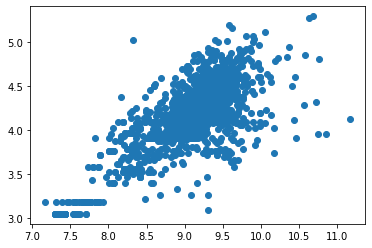

In [40]:
plt.scatter(full['LogLotArea'], full['LogLotFrontage'] )

In [41]:
missing_mask = full.isnull()['LotFrontage']
filled_mask  = full.notnull()['LotFrontage']
predict = full[missing_mask]
train = full[filled_mask]

X_train = train['LogLotArea']
y_train = train['LogLotFrontage']
X_predict = predict['LogLotArea']
model = XGBRegressor(n_jobs = -1)

model.fit(np.array(X_train).reshape(-1,1), np.array(y_train))
y_predict = model.predict(np.array(X_predict).reshape(-1,1))
y_predict.shape

full['LogLotFrontage'][missing_mask] = y_predict

[08:59:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

LotFrontage    480
Functional       2
GarageArea       1
GarageCars       1
dtype: int64

In [43]:
# Filling LotFrontage by doing reverse log transformation
full['LotFrontage'][missing_mask] = np.exp(full['LogLotFrontage'][missing_mask])
missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Functional    2
GarageArea    1
GarageCars    1
dtype: int64

In [44]:
# Filling functional with the Typical value
full['Functional'] = full['Functional'].fillna(0)
missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

GarageArea    1
GarageCars    1
dtype: int64

In [45]:
# Checking missing MasVnrArea
full[full['GarageCars'].isnull()]['GarageCond']

2537   -1.0
Name: GarageCond, dtype: float64

In [46]:
full['GarageCars'] = full['GarageCars'].fillna(-1)
missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

GarageArea    1
dtype: int64

In [47]:
full[full['GarageArea'].isnull()]['GarageCond']

2537   -1.0
Name: GarageCond, dtype: float64

In [48]:
full['GarageArea'] = full['GarageArea'].fillna(-1)
missing_values = full.isnull().sum()
missing_values[missing_values>0].sort_values(ascending = False)

Series([], dtype: int64)

In [49]:
# Adding transformed features (only high skewed will be transformed)
# Idea extracted from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
# Improvements were initially proposed here https://www.kaggle.com/gabrielmilan/pre-os-de-im-veis-em-recife-pe/notebook
skewed_feats = full.apply(lambda x: st.skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index

walk_through_lambdas = True

# Method that gets best lambda for a given distribution
def getBestLambda (data):
    from scipy.stats import boxcox, normaltest

    statistic = []
    pvalue = []

    bclambda_range = np.linspace(-3, 3, 1000)

    for bclambda in bclambda_range:
        transform = boxcox1p(data, bclambda)
        stat, pval = normaltest(transform)
        statistic.append(stat)
        pvalue.append(pval)

    lowest_stat = 8000
    closest = -10
    best_stat = -1
    best_pval = -1
    for i in range(len(bclambda_range)):
        if statistic[i] < lowest_stat:
            lowest_stat = statistic[i]
            best_stat = i
        if (abs(pvalue[i]) - 1) > closest:
            closest = (abs(pvalue[i]) - 1)
            best_pval = i

    return bclambda_range[best_pval], bclambda_range[best_stat]

import progressbar

i = 0
with progressbar.ProgressBar(max_value=len(skewed_features)) as bar:
    for feat in skewed_features:
        if walk_through_lambdas:
            full["BC_{}".format(feat)] = boxcox1p(full[feat], getBestLambda(full[feat])[0])
        else:
            full["BC_{}".format(feat)] = boxcox1p(full[feat], .15)
        i+=1
        bar.update(i)

        
# Clearing columns with null values after transforming
missing_values = full.isnull().sum()
for column in missing_values[missing_values>0].keys():
    print ("Dropping feature {}".format(column))
    full.drop(column, axis = 1, inplace = True)

There are 215 skewed numerical features to Box Cox transform


100% (215 of 215) |######################| Elapsed Time: 0:04:32 Time:  0:04:32


Dropping feature BC_ExterCond
Dropping feature BC_GarageAge
Dropping feature BC_HeatingQC
Dropping feature BC_Longitude
Dropping feature BC_LotShape
Dropping feature BC_Functional


# Split

In [50]:
# Split again into train and test
X_train = full[full['Id'].isin(df_train['Id'])]
X_train.drop('Id', axis = 1, inplace = True)
X_test  = full[full['Id'].isin(df_test['Id'])]
X_test.drop('Id', axis = 1, inplace = True)
y_train = df_train['SalePrice']

print ("X_train shape is {}, y_train shape is {} and X_test shape is {}".format(
    X_train.shape,
    y_train.shape,
    X_test.shape
))

X_train shape is (1421, 423), y_train shape is (1421,) and X_test shape is (1459, 423)


In [0]:
from sklearn.preprocessing import StandardScaler

# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

bclambda = getBestLambda(y_train)[0]
y_train_transformed = boxcox1p(y_train, bclambda)#np.log1p(y_train)#y_train.copy()#

# Feature selection

In [0]:
#
# Modeling
#

# Validation function extracted from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
n_folds = 5

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# Define Root Mean Square Error w/ Cross-validation 
def rmse_cv (model, X, y, cv=5):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = cv))
    return rmse

# Define Pure Root Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse (y_actual, y_predicted):
     return sqrt(mean_squared_error(y_actual, y_predicted))


[09:04:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


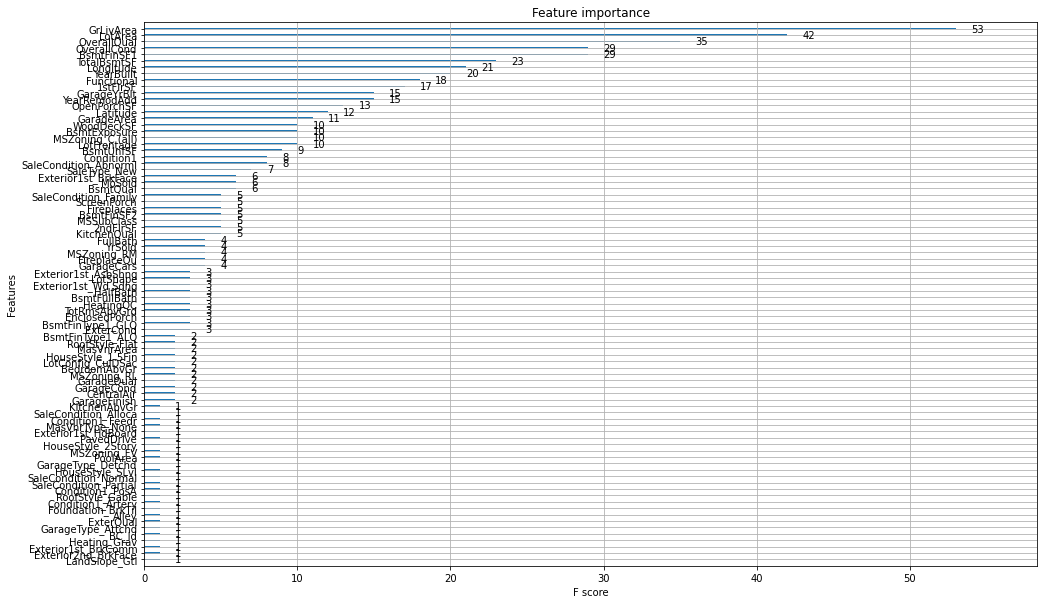

[09:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:04:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

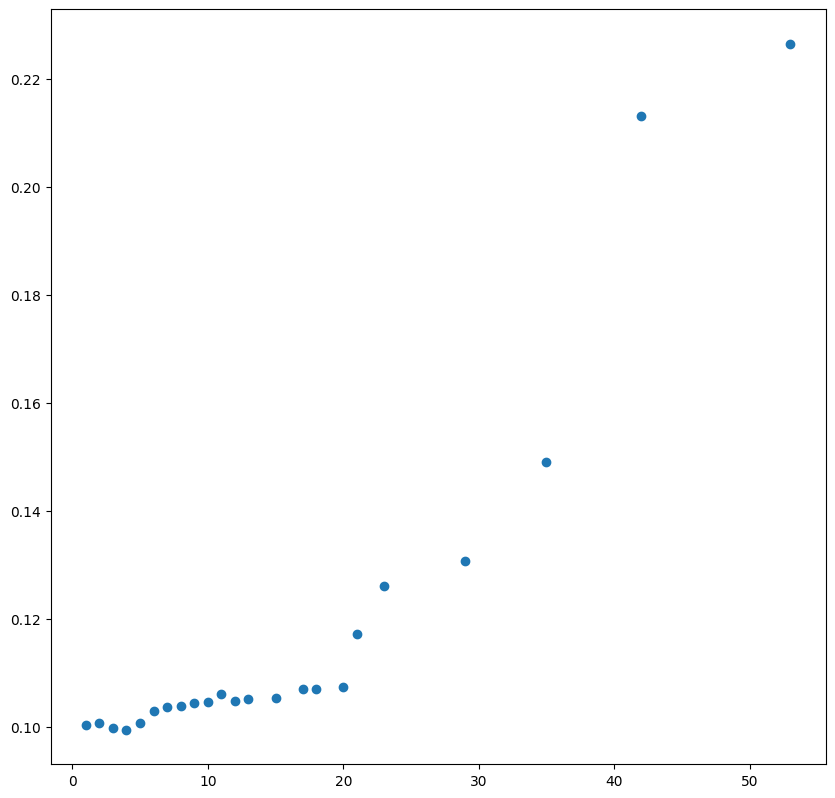

Your best threshold is 9
With this threshold, the features you want are: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'LotFrontage', '1stFlrSF', 'MSZoning_C (all)', 'BsmtFinSF1', 'YearRemodAdd', 'OverallCond', 'LotArea', 'GarageArea', 'Functional', 'GarageYrBlt', 'Longitude', 'BsmtExposure', 'Latitude', 'OpenPorchSF', 'BsmtUnfSF', 'WoodDeckSF']


In [53]:
#
# Extracted from https://www.kaggle.com/gabrielmilan/pre-os-de-im-veis-em-recife-pe/notebook
#

from xgboost import plot_importance

model = XGBRegressor(nthread = -1)
model.fit(X_train, y_train_transformed)

f, ax = plt.subplots(figsize=(16, 10))
plot_importance(model, ax = ax)
plt.show()

# Getting chart data
fscore_dict = model.get_booster().get_fscore()

# Getting threshold values
threshold_values = []
for feature in fscore_dict:
    if fscore_dict[feature] not in threshold_values:
        threshold_values.append(fscore_dict[feature])

# Building lists for later plotting
scores_y = []
        
# Setting a range for the threshold
for threshold in threshold_values:
    feature_list = [feature for feature in X_train.columns if (feature in fscore_dict) and (fscore_dict[feature] >=  threshold)]
    scores_y.append(rmse_cv(model, X_train[feature_list], y_train_transformed).mean())
    
# Plotting
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(threshold_values, scores_y)
plt.show()

# Getting best threshold
min_value = 1000000000000000
best_threshold = 1000
for i in range(len(threshold_values)):
    if scores_y [i] < min_value:
        best_threshold = threshold_values[i]

print ("Your best threshold is {}".format(best_threshold))
xgb_features_list = [feature for feature in fscore_dict if fscore_dict[feature] >= best_threshold]
print ("With this threshold, the features you want are: {}".format(xgb_features_list))


In [0]:
X_train_xgb = X_train [xgb_features_list]
X_train_xgb_scaled = scaler.fit(X_train_xgb).transform(X_train_xgb)
X_test_xgb = X_test [xgb_features_list]
X_test_xgb_scaled = scaler.transform(X_test_xgb)

In [0]:
from sklearn.feature_selection import RFECV

#model = lgb.LGBMRegressor()
#selector = RFECV (model)
#selector.fit(X_train, y_train_transformed)

#RFECV_mask = selector.support_

#rfecv_features_list = []
#for i in range(len(RFECV_mask)):
#    if RFECV_mask[i] == True:
#        rfecv_features_list.append(X_train.columns[i])
#    
#print ("For this metod, the features you want are: {}".format(rfecv_features_list))

rfecv_features_list = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtCond', 'BsmtExposure',
                       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtQual', 'BsmtUnfSF',
                       'CentralAir', 'Condition1', 'Electrical', 'EnclosedPorch', 'ExterCond',
                       'ExterQual', 'FireplaceQu', 'FullBath', 'Functional', 'GarageArea',
                       'GarageCars', 'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GrLivArea',
                       'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LotArea',
                       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea',
                       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
                       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
                       'YearRemodAdd', 'YrSold', 'BsmtFinType1_ALQ', 'BsmtFinType1_GLQ',
                       'BsmtFinType2_BLQ', 'Condition1_Artery', 'Exterior1st_BrkFace',
                       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
                       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Foundation_CBlock',
                       'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd',
                       'HouseStyle_1Story', 'LandContour_Lvl', 'LotConfig_CulDSac',
                       'LotConfig_FR2', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'MSZoning_RL',
                       'MSZoning_RM', 'RoofStyle_Gable', 'SaleCondition_Abnorml',
                       'SaleCondition_Normal', 'SaleType_New', 'SaleType_WD', 'FenceWood',
                       'Latitude', 'Longitude', 'BC_LotArea']

In [0]:
X_train_rfecv = X_train [rfecv_features_list]
X_train_rfecv_scaled = scaler.fit(X_train_rfecv).transform(X_train_rfecv)
X_test_rfecv = X_test [rfecv_features_list]
X_test_rfecv_scaled = scaler.transform(X_test_rfecv)

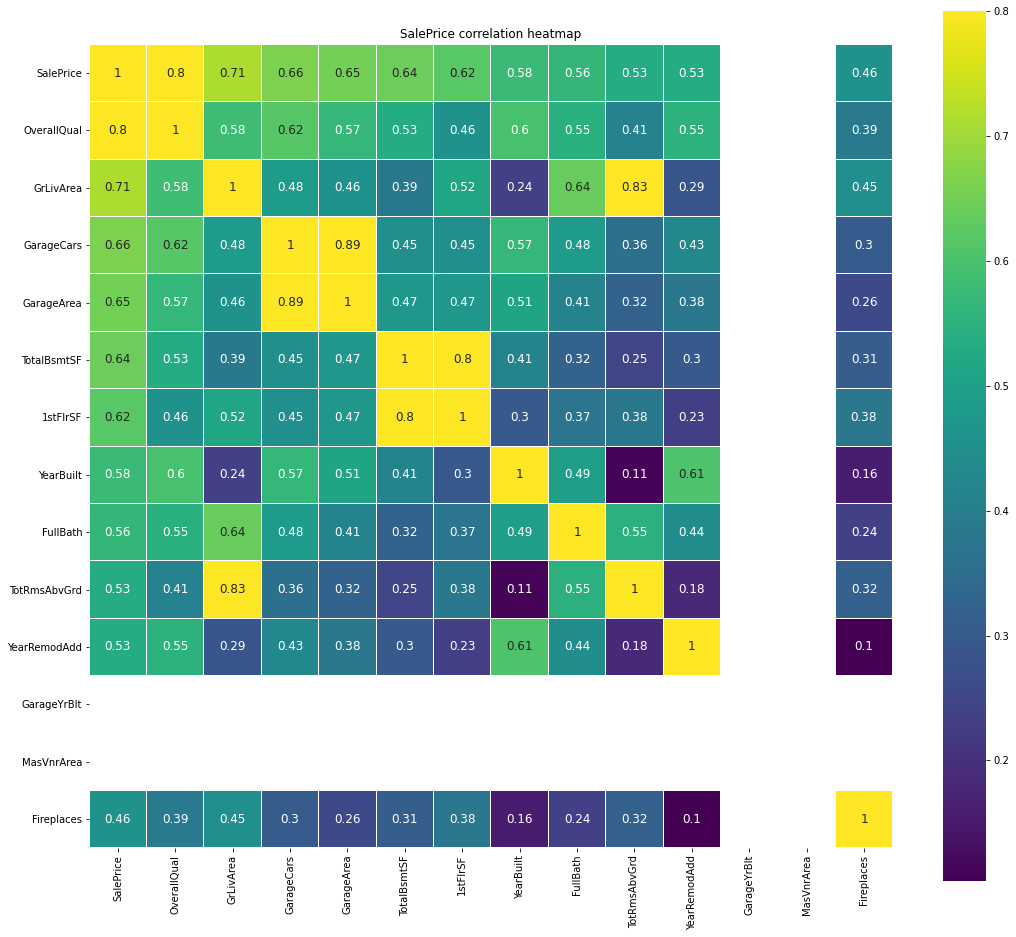

In [57]:
# Heatmap of positive correlation features
import seaborn as sns
correlation = df_train.corr()
k = len([i for i in correlation['SalePrice'] if abs(i) >= 0.4])
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
f , ax = plt.subplots(figsize = (18,16))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
ax.set_title('SalePrice correlation heatmap')
plt.show()
my_cols = list(cols)
if "SalePrice" in my_cols:
    my_cols.remove("SalePrice")

In [58]:
X_train_corr = X_train[my_cols]
X_train_corr.shape

(1421, 13)

# Selecting few models

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR

vanilla_input_size = 0

def VanillaRegressor (input_size = None):
    # Create model
    model = Sequential()
    model.add(Dense(5, input_dim=input_size, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def BetaRegressor (input_size = None):
    model = Sequential()
    model.add(Dense(128, kernel_initializer='normal',input_dim = input_size, activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
    
train_sets = [
    X_train,
    #X_train_scaled,
    X_train_xgb,
    #X_train_xgb_scaled,
    X_train_rfecv,
    #X_train_rfecv_scaled,
    X_train_corr
]

other_models = [
    ElasticNet(),                       # X_train          -> 0.1308
    Lasso(),                            # X_train          -> 0.1393
    BayesianRidge(),                    # X_train_rfecv    -> 0.0953
    LassoLarsIC(),                      # X_train_rfecv    -> 0.1034
    RandomForestRegressor(),            # X_train          -> 0.1193
    GradientBoostingRegressor(),        # X_train_rfecv    -> 0.1002
    KernelRidge(),                      # X_train_rfecv    -> 0.0959
    xgb.XGBRegressor(),                 # X_train_rfecv    -> 0.0997
    xgb.XGBRFRegressor(),               # <any>            -> 0.3244
    lgb.LGBMRegressor(),                # X_train_rfecv    -> 0.1024
    SVR()                               # X_train_corr     -> 0.3224
]

other_models_names = [
    'ElasticNet',
    'Lasso',
    'BayesianRidge',
    'LassoLarsIC',
    'RandomForestRegressor',
    'GradientBoostingRegressor',
    'KernelRidge',
    'XGBRegressor',
    'XGBRFRegressor',
    'LGBMRegressor',
    'SVR'
]

# Evaluating models
# for j in range(len(other_models)):
#     for i in range(len(train_sets)):
#         score = rmse_cv(other_models[j], train_sets[i], y_train_transformed)
#         print ("{} scored {:.4f}(+-{:.4f}) with the set #{}".format(other_models_names[j], score.mean(), score.std(), i+1))

Using TensorFlow backend.


# Hyper-params tuning

In [0]:
# Choosing one X_train for hyper-parameter tuning
chosen_X_train = X_train_rfecv.copy()
chosen_X_test = X_test_rfecv.copy()

In [0]:
# Grid search for hyper-parameters
from sklearn.model_selection import GridSearchCV
class grid():
    def __init__ (self, model):
        self.model = model
    def grid_get (self, X, y, param_grid):
        grid_search = GridSearchCV(self.model, param_grid, scoring='neg_mean_squared_error', verbose=99)
        grid_search.fit(X, y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score']])

make_search = False
max_iter = 15000
dataset = chosen_X_train

# Will keep the following models for hyper-params tuning:
# - BayesianRidge
# - GradientBoostingRegressor
# - KernelRidge
# - XGBRegressor
# - LGBMRegressor
#	BayRidge	GBR	KernelR	XGB	LGBM	
#1	0.0956	0.1018	0.0971	0.1008	0.1028	0.4981
#3	0.1066	0.1049	0.1063	0.106	0.1079	0.5317
#5	0.0953	0.1006	0.0959	0.1005	0.1022	0.4945
#	0.2975	0.3073	0.2993	0.3073	0.3129	


In [0]:
# Grid search for Gradient Boost Regressor
if (make_search):
    grid(GradientBoostingRegressor()).grid_get(dataset, y_train_transformed, {
        'loss' : ['ls', 'huber'],
        'learning_rate' : np.linspace(0.01, 0.1, 11),
        'n_estimators' : np.linspace(300, 700, 6).astype(int)
    })

# {'learning_rate': 0.064, 'loss': 'huber', 'n_estimators': 620}

In [0]:
# Grid search for BayesianRidge
#if (make_search):
#    grid(BayesianRidge()).grid_get(dataset, y_train_transformed, {
#        'alpha_1' : np.linspace(1e-7, 1e-5, 101),
#        'alpha_2' : np.linspace(1e-7, 1e-5, 101),
#        'lambda_1': np.linspace(1e-7, 1e-5, 101),
#        'lambda_2': np.linspace(1e-7, 1e-5, 101),
#    })

# Can't tune BayRidge for my PC crashes

In [0]:
# Grid search for LGBMRegressor
if (make_search):
    grid(lgb.LGBMRegressor()).grid_get(dataset, y_train_transformed, {
        'n_jobs'        : [-1],
        'boosting_type' : ['gbdt'],
        'num_leaves'    : np.linspace(1, 50, 11).astype(int),
        'learning_rate' : np.linspace(0.01, 0.1, 11),
        'n_estimators'  : np.linspace(100, 700, 6).astype(int)
    })

# {'boosting_type': 'gbdt', 'learning_rate': 0.028000000000000004, 'n_estimators': 700, 'n_jobs': -1, 'num_leaves': 5}

# Few improvements using scalers and feature generators

In [0]:
import xgboost as xgb
from sklearn.pipeline import make_pipeline

train_sets = [
    X_train_rfecv,
]

br = BayesianRidge()
llic = LassoLarsIC()
gb = GradientBoostingRegressor(learning_rate=0.064, loss='huber', n_estimators=620)
kr = KernelRidge()
lgbm = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.028000000000000004, n_estimators=700, n_jobs=-1, num_leaves=5)
xgbr = xgb.XGBRegressor()

other_models = [
#     BayesianRidge(),                                                           # --> 0.0953
#     make_pipeline(MinMaxScaler(), PolynomialFeatures(2), br),                  # 0.1010
#     make_pipeline(MaxAbsScaler(), PolynomialFeatures(2), br),                  # 0.1011
#     make_pipeline(StandardScaler(), PolynomialFeatures(2), br),                # 0.1343
#     make_pipeline(RobustScaler(), PolynomialFeatures(2), br),                  # 0.2745
#     make_pipeline(Normalizer(), PolynomialFeatures(2), br),                    # 0.1106
#     make_pipeline(QuantileTransformer(), PolynomialFeatures(2), br),           # 0.1053
#     make_pipeline(PowerTransformer(), PolynomialFeatures(2), br),              # 0.1392

#     LassoLarsIC(),                                                               # 0.1034
#     make_pipeline(MinMaxScaler(), PolynomialFeatures(2), llic),                  # 0.1096
#     make_pipeline(MaxAbsScaler(), PolynomialFeatures(2), llic),                  # --> 0.1034
#     make_pipeline(StandardScaler(), PolynomialFeatures(2), llic),                # 0.2979
#     make_pipeline(RobustScaler(), PolynomialFeatures(2), llic),                  # 0.2979
#     make_pipeline(Normalizer(), PolynomialFeatures(2), llic),                    # 0.3098
#     make_pipeline(QuantileTransformer(), PolynomialFeatures(2), llic),           # 0.1160
#     make_pipeline(PowerTransformer(), PolynomialFeatures(2), llic),              # 0.2901

#     GradientBoostingRegressor(),                                               # --> 0.1002
#     make_pipeline(MinMaxScaler(), PolynomialFeatures(2), gb),                  # 0.1020
#     make_pipeline(MaxAbsScaler(), PolynomialFeatures(2), gb),                  # 0.1044
#     make_pipeline(StandardScaler(), PolynomialFeatures(2), gb),                # 0.1073
#     make_pipeline(RobustScaler(), PolynomialFeatures(2), gb),                  # 0.1053
#     make_pipeline(Normalizer(), PolynomialFeatures(2), gb),                    # 0.1211
#     make_pipeline(QuantileTransformer(), PolynomialFeatures(2), gb),           # 0.1034
#     make_pipeline(PowerTransformer(), PolynomialFeatures(2), gb),              # 0.1080

#     KernelRidge(),                                                             # --> 0.0959
#     make_pipeline(MinMaxScaler(), PolynomialFeatures(2), kr),                  # 0.2539
#     make_pipeline(MaxAbsScaler(), PolynomialFeatures(2), kr),                  # 0.1260
#     make_pipeline(StandardScaler(), PolynomialFeatures(2), kr),                # 1.5792
#     make_pipeline(RobustScaler(), PolynomialFeatures(2), kr),                  # 7.8296
#     make_pipeline(Normalizer(), PolynomialFeatures(2), kr),                    # 0.2113
#     make_pipeline(QuantileTransformer(), PolynomialFeatures(2), kr),           # 0.3479
#     make_pipeline(PowerTransformer(), PolynomialFeatures(2), kr),              # 1.2862

#     xgb.XGBRegressor(),                                                          # --> 0.0997
#     make_pipeline(MinMaxScaler(), PolynomialFeatures(2), xgbr),                  # 0.1037
#     make_pipeline(MaxAbsScaler(), PolynomialFeatures(2), xgbr),                  # 0.1068
#     make_pipeline(StandardScaler(), PolynomialFeatures(2), xgbr),                # 0.1075
#     make_pipeline(RobustScaler(), PolynomialFeatures(2), xgbr),                  # 0.1097
#     make_pipeline(Normalizer(), PolynomialFeatures(2), xgbr),                    # 0.1270
#     make_pipeline(QuantileTransformer(), PolynomialFeatures(2), xgbr),           # 0.1047
#     make_pipeline(PowerTransformer(), PolynomialFeatures(2), xgbr),              # 0.1069

#     lgb.LGBMRegressor(),                                                         # 0.1024
#     make_pipeline(MinMaxScaler(), PolynomialFeatures(2), lgbm),                  # --> 0.0999
#     make_pipeline(MaxAbsScaler(), PolynomialFeatures(2), lgbm),                  # 0.1031
#     make_pipeline(StandardScaler(), PolynomialFeatures(2), lgbm),                # 0.1054
#     make_pipeline(RobustScaler(), PolynomialFeatures(2), lgbm),                  # 0.1048
#     make_pipeline(Normalizer(), PolynomialFeatures(2), lgbm),                    # 0.1197
#     make_pipeline(QuantileTransformer(), PolynomialFeatures(2), lgbm),           # 0.1016
#     make_pipeline(PowerTransformer(), PolynomialFeatures(2), lgbm),              # 0.1059
    
]

# Evaluating models
for j in range(len(other_models)):
    for i in range(len(train_sets)):
        score = rmse_cv(other_models[j], train_sets[i], y_train_transformed, cv=2)
        print ("{} scored {:.4f}(+-{:.4f}) with the set #{}".format(other_models[j], score.mean(), score.std(), i+1))

# Model stacking and choosing best combo

In [66]:
# Defining function for making models combinations
def make_combinations (iterable):
    from itertools import combinations
    my_combs = []
    for item in iterable.copy():
        iterable.remove(item)
        for i in range(len(iterable)):
            for comb in combinations(iterable, i+1):
                my_combs.append((item, comb))
        iterable.append(item)
    return my_combs

models = [
    # 0.09534141759933776
    BayesianRidge(),
    # 0.10947055605680345
    make_pipeline(MaxAbsScaler(), PolynomialFeatures(2), LassoLarsIC()),
    # 0.09675792855029856
    GradientBoostingRegressor(learning_rate=0.064, loss='huber', n_estimators=620),
    # 0.09594388448467231
    KernelRidge(),
    # 0.09972041539723736
    xgb.XGBRegressor(),
    # 0.09624848214154685
    make_pipeline(MinMaxScaler(), PolynomialFeatures(2), lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.028000000000000004, n_estimators=700, n_jobs=-1, num_leaves=5))
]

my_combs = make_combinations(models)

print ("I have {} combinations to test!".format(len(my_combs)))

I have 186 combinations to test!


In [67]:
# Testing every possible combination
print ("Testing raw models...")
i = 0
results = []
best = 10000
# with progressbar.ProgressBar(max_value=len(models)) as bar:
#     for model in models:
#         X = chosen_X_train#.values
#         score = rmse_cv(model, X, y_train_transformed).mean()
#         results.append(score)
#         print (score)
#         if (score < best):
#             best = score
#             best_model = model
#         i+=1
#         bar.update(i)

Testing raw models...


In [68]:
class CustomEnsemble (BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models, meta_model, scaler=MaxAbsScaler(), feature_generator=None):
        self.models = models
        if scaler:
            if feature_generator:
                self.meta_model = make_pipeline(scaler, feature_generator, meta_model)
            else:
                self.meta_model = make_pipeline(scaler, meta_model)
        else:
            if feature_generator:
                self.meta_model = make_pipeline(feature_generator, meta_model)
            else:
                self.meta_model = meta_model
    def fit(self,X,y):
        predictions = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            model.fit (X, y)
            predictions[:,i] = model.predict(X)
        self.meta_model.fit(predictions, y)
    def predict(self,X):
        predictions = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            predictions[:,i] = model.predict(X)
        return self.meta_model.predict(predictions)
    def __str__ (self):
        return "<CustomEnsemble (meta={}, models={})>".format(self.meta_model, self.models)
    def __repr__ (self):
        return self.__str__()

models = [
    # 0.09534141759933776
    BayesianRidge(),
    # 0.09594388448467231
    KernelRidge(),
    # 0.09624848214154685
    make_pipeline(MinMaxScaler(), PolynomialFeatures(2), lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.028000000000000004, n_estimators=700, n_jobs=-1, num_leaves=5))
]
my_combs = make_combinations(models)
print ("I chose {} combinations to test!".format(2*len(my_combs)))
    
# Testing every possible combination
# print ("Testing combinations...")
# i = 0
# results = []
# best = 10000
# with progressbar.ProgressBar(max_value=2*len(my_combs)) as bar:
#     for comb in my_combs:
#         X = chosen_X_train#.values
#         stack_model = CustomEnsemble(list(comb[1]), comb[0])
#         score = rmse_cv(stack_model, X, y_train_transformed).mean()
#         results.append(score)
#         #print ("Score: {}".format(score))
#         if (score < best):
#             print ("Score {:.4f} is better than previous best. Saving...".format(score))
#             best = score
#             best_model = stack_model
#         i+=1
#         bar.update(i)
#         stack_model = CustomEnsemble(list(comb[1]), comb[0], scaler=None)
#         score = rmse_cv(stack_model, X, y_train_transformed).mean()
#         results.append(score)
#         #print ("Score: {}".format(score))
#         if (score < best):
#             print ("Score {:.4f} is better than previous best. Saving...".format(score))
#             best = score
#             best_model = stack_model
#         i+=1
#         bar.update(i)

# === Best model was:
# <CustomEnsemble (meta=Pipeline(memory=None,
#          steps=[('maxabsscaler', MaxAbsScaler(copy=True)),
#                 ('kernelridge',
#                  KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
#                              kernel='linear', kernel_params=None))],
#          verbose=False), models=[Pipeline(memory=None,
#          steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
#                 ('polynomialfeatures',
#                  PolynomialFeatures(degree=2, include_bias=True,
#                                     interaction_only=False, order='C')),
#                 ('lgbmregressor',
#                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
#                                colsample_bytree=1.0, importance_type='split',
#                                learning_rate=0.028000000000000004, max_depth=-1,
#                                min_child_samples=20, min_child_weight=0.001,
#                                min_split_gain=0.0, n_estimators=700, n_jobs=-1,
#                                num_leaves=5, objective=None, random_state=None,
#                                reg_alpha=0.0, reg_lambda=0.0, silent=True,
#                                subsample=1.0, subsample_for_bin=200000,
#                                subsample_freq=0))],
#          verbose=False), BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
#               fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
#               normalize=False, tol=0.001, verbose=False)])>
best_model = CustomEnsemble(
    models = [
        make_pipeline(MinMaxScaler(), PolynomialFeatures(2), lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.028000000000000004, n_estimators=700, n_jobs=-1, num_leaves=5)),
        BayesianRidge()
    ],
    meta_model = KernelRidge(),
    scaler = MaxAbsScaler()
)
best = 0.09228172938603223

I chose 18 combinations to test!


In [69]:
print ("And the best model goes to...")
print (best_model)
print ("Its score was {}".format (best))

And the best model goes to...
<CustomEnsemble (meta=Pipeline(memory=None,
         steps=[('maxabsscaler', MaxAbsScaler(copy=True)),
                ('kernelridge',
                 KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
                             kernel='linear', kernel_params=None))],
         verbose=False), models=[Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lgbmregressor',
                 LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=1.0, importance_type='split',
                               learning_rate=0.028000000000000004, max_depth=-1,
                               min_child_samples=20, min_child_weight=0.001,
                               min_split_g

In [0]:
from scipy.special import inv_boxcox1p

best_model.fit(chosen_X_train, y_train_transformed)

sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = inv_boxcox1p(best_model.predict(chosen_X_test), bclambda)
#sub['SalePrice'] = inv_boxcox1p(best_model.predict(chosen_X_test.values), bclambda)
sub.to_csv('../outputsubmission.csv',index=False)